In [1]:
# %matplotlib widget


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import *


## 嵌入水印

### 读取图像并进行傅里叶变换

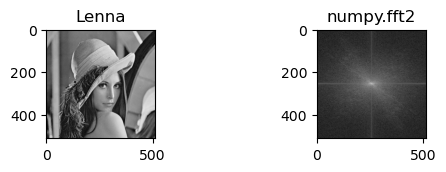

In [3]:
img = cv2.imread('Lenna.png', cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fft = fft2(gray_img)
shift_fft = fftshift(fft)

plt.subplot(3, 2, 1)
plt.title('Lenna')
plt.imshow(gray_img, cmap='gray')
plt.subplot(3, 2, 2)
plt.title('numpy.fft2')
plt.imshow(np.log(1 + np.abs(shift_fft)), cmap='gray', vmin=5)


### 添加水印并进行傅里叶逆变换

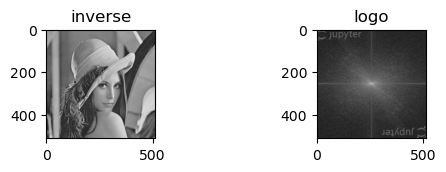

In [4]:
logo = cv2.imread('logo.png', cv2.IMREAD_COLOR)
gray_logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
# 将 logo 按 fft 的大小填充
gray_logo = np.pad(gray_logo, ((0, shift_fft.shape[0] - gray_logo.shape[0]), (0, shift_fft.shape[1] - gray_logo.shape[1])), 'constant', constant_values=0)
# 将 logo 中心对称
gray_logo = gray_logo + cv2.rotate(gray_logo, cv2.ROTATE_180)
shift_fft_logo = shift_fft + gray_logo * 1000

inverse = np.abs(ifft2(ifftshift(shift_fft_logo)).real)
plt.subplot(3, 2, 3)
plt.title('inverse')
plt.imshow(inverse, cmap='gray', vmax=256)

plt.subplot(3, 2, 4)
plt.title('logo')
plt.imshow(np.log(1 + np.abs(shift_fft_logo)), cmap='gray', vmin=5)

### 计算差值

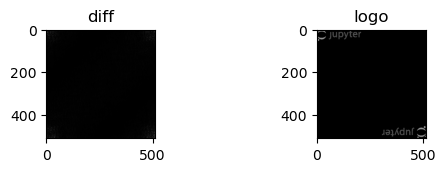

In [5]:
diff = np.abs(gray_img - inverse)

plt.subplot(3, 2, 5)
plt.title('diff')
plt.imshow(diff, cmap='gray', vmax=256)
plt.subplot(3, 2, 6)
plt.title('logo')
plt.imshow(gray_logo, cmap='gray', vmax=256)


In [6]:
plt.show()


## 提取水印